In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'D:\Datasets\surgical.csv')
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [4]:
data.shape

(14635, 25)

In [5]:
data.isna().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

<AxesSubplot:>

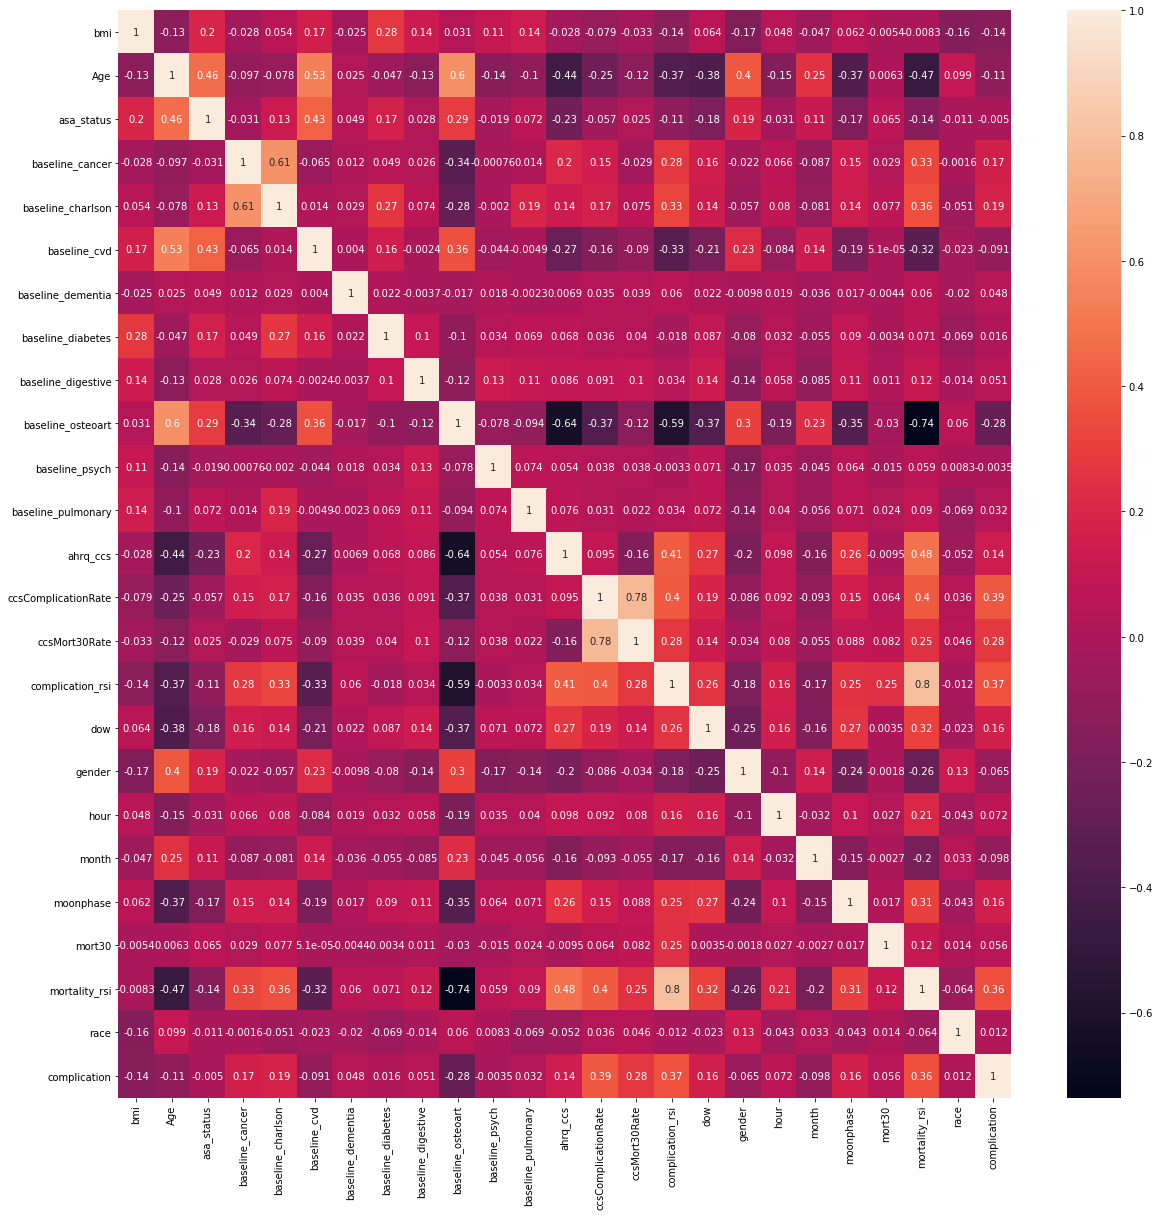

In [8]:
#correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

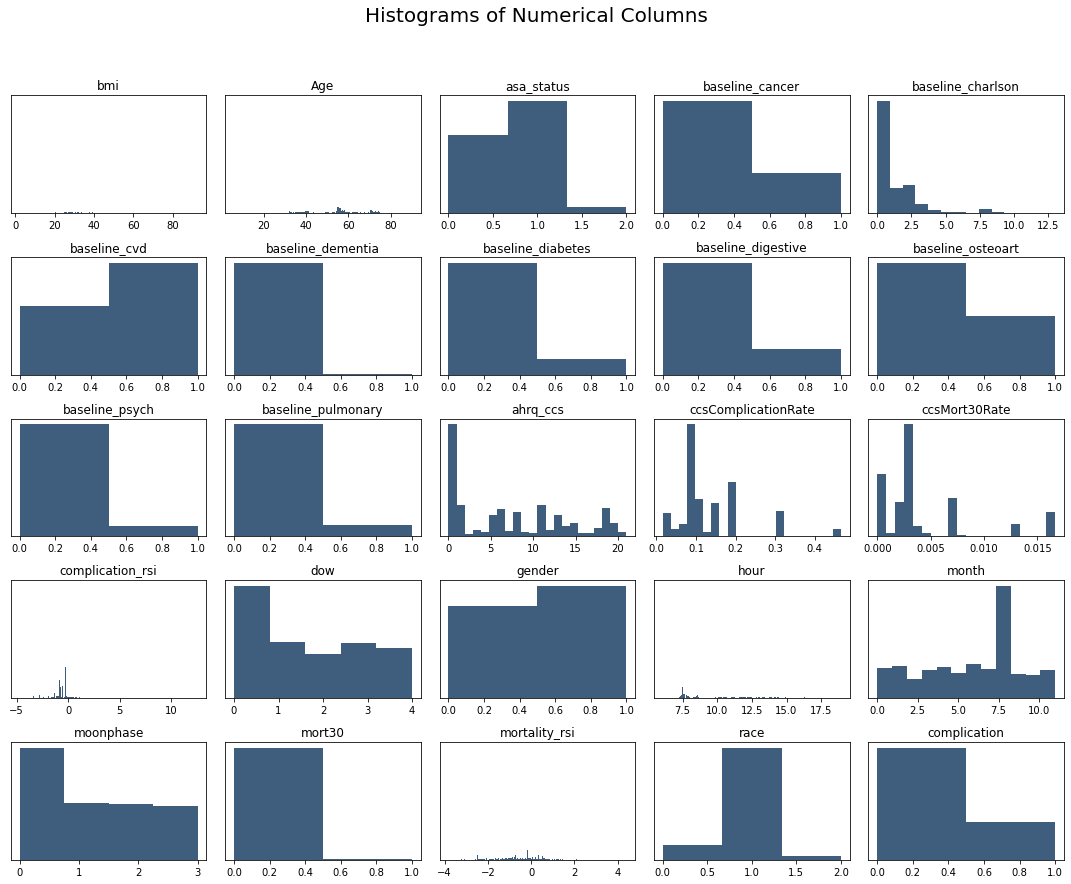

In [11]:
fig = plt.figure(figsize=(15, 15))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, data.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data.columns.values[i - 1])

    vals = np.size(data.iloc[:, i - 1].unique())
    plt.hist(data.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [15]:
data2=data.drop(columns=['bmi','Age','hour'])


In [16]:
x=data2.drop(columns=['complication'])
y=data2['complication']

In [17]:
y.value_counts()

0    10945
1     3690
Name: complication, dtype: int64

In [19]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2



In [21]:
from imblearn.over_sampling import SMOTE
x_re,y_re=SMOTE().fit_resample(x,y.values.ravel())
x_re=pd.DataFrame(x_re)
y_re=pd.DataFrame(y_re)

In [25]:
#splitting into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_re,y_re,test_size=0.3,random_state=0)
y_test.shape

(6567, 1)

In [26]:
#scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(x_train))
X_test2 = pd.DataFrame(sc_X.transform(x_test))
X_train2.columns = x_train.columns.values
X_test2.columns = x_test.columns.values
X_train2.index = x_train.index.values
X_test2.index = x_test.index.values
x_train = X_train2
x_test = X_test2

# MODEL USING VOTING

In [27]:
#model building
# using SVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
model=SVC()
estimators=[]
estimators.append(('SVC',model))

In [32]:
model.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [33]:
y_predict=model.predict(x_test)

In [34]:
accuracy_score(y_test,y_predict)

0.77691487741739

<AxesSubplot:>

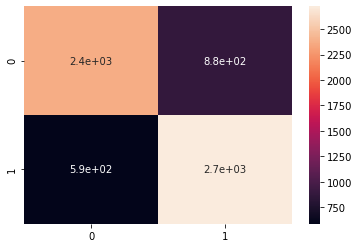

In [35]:
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True)

In [36]:
#model using decision tree
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()

estimators.append(('decision_tree',model2))

In [37]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)


0.77691487741739

In [39]:
#using logistic regression
from sklearn.linear_model import LogisticRegression
model3=LogisticRegression()
estimators.append(('LR',model3))

In [40]:
model3.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
y_predict=model.predict(x_test)
accuracy_score(y_test,y_predict)

0.77691487741739

In [42]:
#ensemble
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators)

In [43]:
#cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = ensemble,X=x_train,y=y_train,cv=10)
print("Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

Accuracy: 0.785 (+/- 0.020)


# USING XGBOOST


In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
from xgboost import XGBClassifier

In [55]:
ensemble=XGBClassifier(n_estimators=500,n_jobs=10)

In [56]:
ensemble.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=10, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
prediction=ensemble.predict(x_test)

In [58]:
accuracy_score(y_test,prediction)

0.85503273945485

# Outlier detection

<AxesSubplot:xlabel='mortality_rsi'>

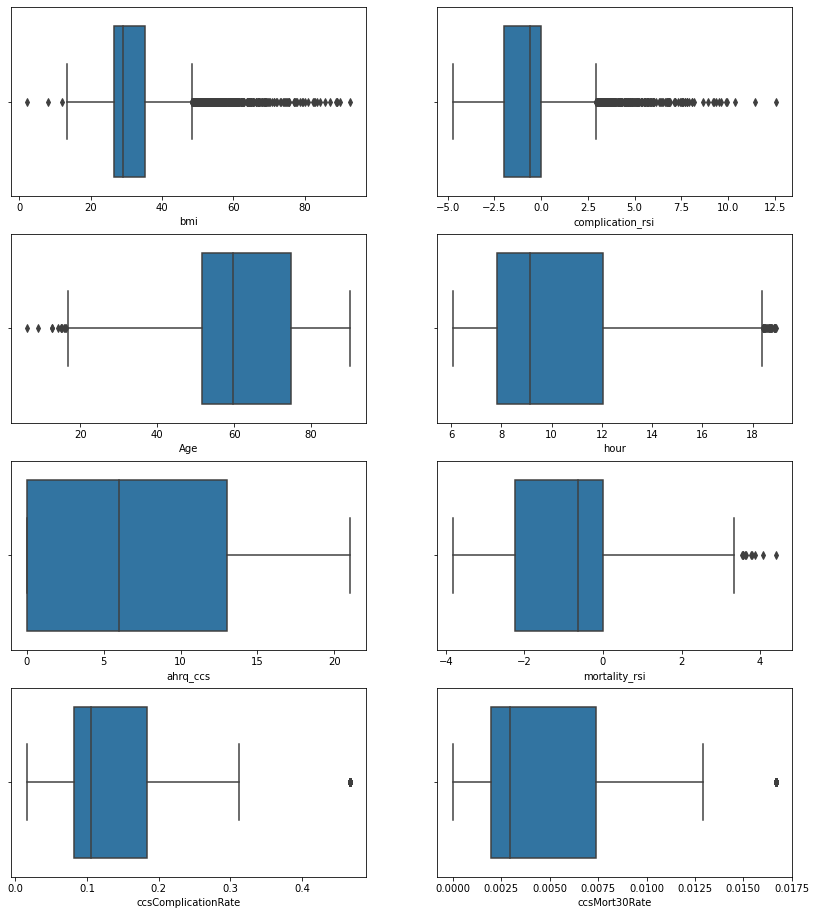

In [61]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 16))
sns.boxplot(x = 'bmi', data = data, ax=axes[0][0])
sns.boxplot(x = 'Age', data = data, ax=axes[1][0])
sns.boxplot(x = 'ahrq_ccs', data = data, ax=axes[2][0])
sns.boxplot(x = 'ccsComplicationRate', data = data, ax=axes[3][0])
sns.boxplot(x = 'ccsMort30Rate', data = data, ax=axes[3][1])
sns.boxplot(x = 'complication_rsi', data = data, ax=axes[0][1])
sns.boxplot(x = 'hour', data = data, ax = axes[1][1])
sns.boxplot(x = 'mortality_rsi', data = data, ax = axes[2][1])

#  Outlier removal using IQR technique

In [62]:
def remove_outliers(data):
    arr=[]
    #print(max(list(data)))
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    mi=q1-(1.5*iqr)
    ma=q3+(1.5*iqr)
    #print(mi,ma)
    for i in list(data):
        if i<mi:
            i=mi
            arr.append(i)
        elif i>ma:
            i=ma
            arr.append(i)
        else:
            arr.append(i)
    
    return arr

In [76]:
data['bmi'] = remove_outliers(data['bmi'])
data['complication_rsi'] = remove_outliers(data['complication_rsi'])
data['Age'] = remove_outliers(data['Age'])
data['hour'] = remove_outliers(data['hour'])
data['ahrq_ccs'] = remove_outliers(data['ahrq_ccs'])
data['mortality_rsi'] = remove_outliers(data['mortality_rsi'])
data['ccsComplicationRate'] = remove_outliers(data['ccsComplicationRate'])
data['ccsMort30Rate'] = remove_outliers(data['ccsMort30Rate'])
data.shape

(14635, 25)

<AxesSubplot:xlabel='mortality_rsi'>

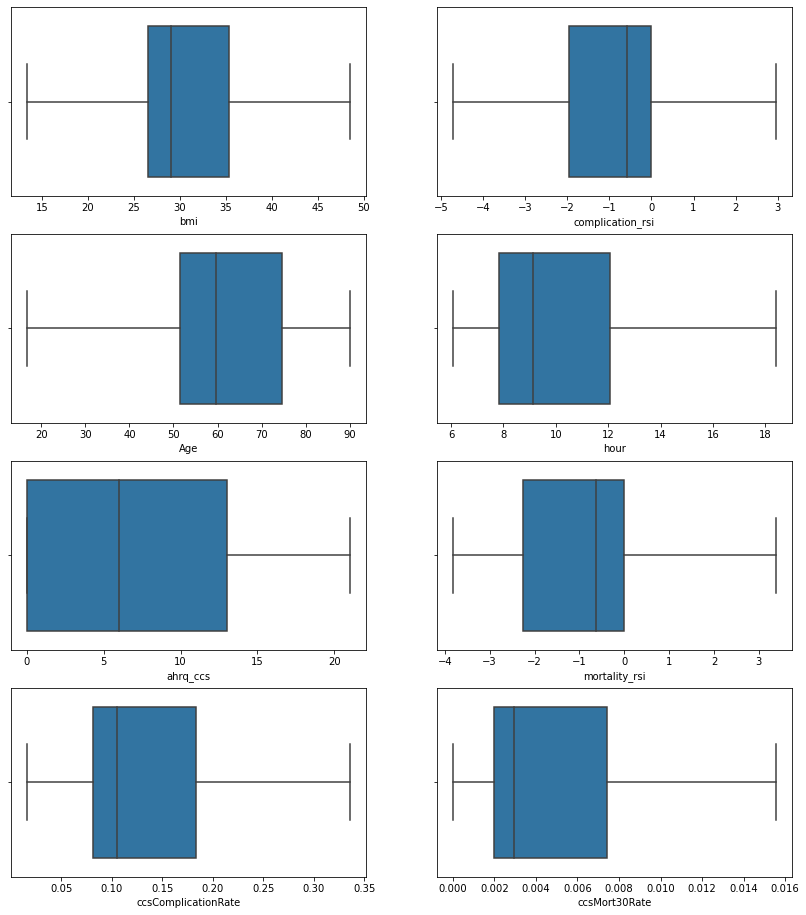

In [64]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (14, 16))
sns.boxplot(x = 'bmi', data = data, ax=axes[0][0])
sns.boxplot(x = 'Age', data = data, ax=axes[1][0])
sns.boxplot(x = 'ahrq_ccs', data = data, ax=axes[2][0])
sns.boxplot(x = 'ccsComplicationRate', data = data, ax=axes[3][0])
sns.boxplot(x = 'ccsMort30Rate', data = data, ax=axes[3][1])
sns.boxplot(x = 'complication_rsi', data = data, ax=axes[0][1])
sns.boxplot(x = 'hour', data = data, ax = axes[1][1])
sns.boxplot(x = 'mortality_rsi', data = data, ax = axes[2][1])

In [65]:
data2=data.drop(columns=['bmi','Age','hour'])


In [66]:
x=data2.drop(columns=['complication'])
y=data2['complication']

In [67]:
from imblearn.over_sampling import SMOTE
x_re,y_re=SMOTE().fit_resample(x,y.values.ravel())
x_re=pd.DataFrame(x_re)
y_re=pd.DataFrame(y_re)

In [68]:
#splitting into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_re,y_re,test_size=0.3,random_state=0)
y_test.shape

(6567, 1)

In [69]:
#scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(x_train))
X_test2 = pd.DataFrame(sc_X.transform(x_test))
X_train2.columns = x_train.columns.values
X_test2.columns = x_test.columns.values
X_train2.index = x_train.index.values
X_test2.index = x_test.index.values
x_train = X_train2
x_test = X_test2

In [70]:
from xgboost import XGBClassifier

In [71]:
ensemble=XGBClassifier(n_estimators=500,n_jobs=10)

In [72]:
ensemble.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22:33:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=10, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
prediction=ensemble.predict(x_test)

In [75]:
accuracy_score(y_test,prediction)

0.8521394853053145

In [77]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3257
           1       0.85      0.85      0.85      3310

    accuracy                           0.85      6567
   macro avg       0.85      0.85      0.85      6567
weighted avg       0.85      0.85      0.85      6567



# The model has an accuracy of 85% u